(chap:10-gdp)=
# GDPと構成要素

In [1]:
import numpy as np
import pandas as pd
import japanize_matplotlib
import py4macro

## はじめに

```{margin}
<div name="html-admonition">
Do you want to read in a differnt language? Start
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google" style="color:#ffffff;background-color:#008080;" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/><input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="translation" style="color:#ffffff;background-color:#008080;" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/>
in English or the language of your choice.
</div>
```

人の心の中を知ることはできない。友人，同僚，パートナー，親族もそうである。また何十年も連れ添った夫婦でさえも完全にお互いの心の中を分かっているとは言い難いだろう。しかし話し言葉やその内容，行動から心の中を推測することは可能である。実際，我々は日常そうしており，人間関係を豊かにする為には必須でる。経済も同じである。経済の動きの裏にある「真のメカニズム」は完全に把握されていない。アダム・スミスの時代に比べると，「熟練夫婦」に匹敵するほど知見は蓄積されたかも知れないが，今でも「真のメカニズム」が100％解明されたとは言い難い。経済学者にとってできることは，経済の「言動」であるデータを観察し「真のメカニズム」について想像を巡らすことである。人の言動に注意を払わずに人の心の中を想像するのは「妄想」となり，データを無視して経済を考えるのは「空想」となってしまう危険性がある。
> 人の心の中　$\Longleftrightarrow$　経済の真のメカニズム
>
> 人の言動　$\Longleftrightarrow$　経済データ

この章はマクロ・データの特徴を理解することを目的とする。統計量やプロットを駆使して異なるマクロ・データの特性を炙り出し，経済の「言動」に注目しようということである。特に，以下では国内総生産（GDP）とその構成要素に着目し議論を進める。

使うデータは`py4macro`に含まれる日本の四半期データである。1980年から1993年のデータと1994年から2019年までの２つのデータ・セットを組み合わせて作成した。2020年までアップデートすることも可能だが，そうすると２つのデータ・セットの整合性に問題は発生してしまうので，2020年の1年間のデータより13年間のデータを優先した形となっている。データを読み込むには次のようにする。
```
py4macro.data('jpn-q')
```
ここでjpnはJapan，qはquerterlyを表している。変数の定義を表示するには`description=True`の引数を追加する。

In [2]:
py4macro.data('jpn-q', description=True)


    | `gdp`: 国内総生産（GDP）
    | `consumption`: 消費
    | `investment`: 投資
    | `government`: 政府支出
    | `exports`: 輸出
    | `imports`: 輸入
    | `capital`: 資本ストック
    | `employed`: 就業者数
    | `unemployed`: 失業者数
    | `unemployment_rate`: 失業率
    | `hours`: 労働者一人当たり月平均労働時間
    | `total_hours`: 月平均総労働時間（`employed`X`hours`）
    | `inflation`: インフレ率
    |
    | ＜出典＞
    | GDPとその構成要素
    |    * 1994年Q1~2019年Q4
    |        * 実額・四半期・実質季節調整系列（年換算）
    |        * 2011暦年（平成23年）連鎖価格
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |    * 1980年Q1~1993年Q4
    |        * 実額・四半期・実質季節調整系列（年換算）
    |        * 平成23年基準支出側GDP系列簡易遡及（参考系列であり上のデータと接続可能）
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |
    | 実質資本ストック
    |   * 1994年Q1~2019年Q4
    |        * 平成23年基準
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |   * 1980年Q1~1993年Q4
    |        * 平成23年基準遡及系列
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |
    | 就業者数，失業者数，失業率
    |   * 総務省「労働力調査」
    |   * 単位：万人
    |
    | 労

このデータ・セットにはGDPとその構成要素以外も含まれているが，それらは次章で使うことになる。

まずデータを読み込んで最初の５行を表示してみよう。

In [3]:
df = py4macro.data('jpn-q')
df.head()

,gdp,consumption,investment,government,exports,imports,capital,employed,unemployed,unemployment_rate,hours,total_hours,inflation
,,,,,,,,,,,,,
1980-03-31,257829.7,150976.5,57057.1,71405.2,16522.8,22945.5,754761.0,5506.000000,107.666667,1.900000,117.6,647505.600000,5.766667
1980-06-30,255945.6,150439.6,57380.9,70573.1,16745.4,24056.8,762315.1,5525.666667,110.000000,1.966667,117.7,650370.966667,8.166667
1980-09-30,261316.6,152332.1,57747.2,71041.8,16581.7,22574.1,772684.2,5561.333333,116.000000,2.033333,116.8,649563.733333,8.200000
1980-12-31,266772.3,153105.1,57989.9,73028.2,17710.7,22414.2,784646.4,5551.333333,123.333333,2.166667,116.8,648395.733333,8.100000
1981-03-31,268719.1,153426.4,58095.1,74453.2,18235.6,22846.6,794633.6,5568.666667,124.333333,2.200000,116.6,649306.533333,6.833333


列には変数が並んでいるのが確認できる。行はインデックスではなくラベルとなっており，年・四半期を示している。例えば、`1980-3-31`は1980年第１四半期であり，その最終日がラベルとして使われている。`.info()`を使って確認してみる。

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 1980-03-31 to 2019-12-31
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gdp                160 non-null    float64
 1   consumption        160 non-null    float64
 2   investment         160 non-null    float64
 3   government         160 non-null    float64
 4   exports            160 non-null    float64
 5   imports            160 non-null    float64
 6   capital            160 non-null    float64
 7   employed           160 non-null    float64
 8   unemployed         160 non-null    float64
 9   unemployment_rate  160 non-null    float64
 10  hours              160 non-null    float64
 11  total_hours        160 non-null    float64
 12  inflation          160 non-null    float64
dtypes: float64(13)
memory usage: 17.5 KB


表示の上から２行目に`DatetimeIndex`とあるが，行ラベルのことを表しており，時系列データ用となっている。具体的な説明は割愛するが，時系列データが扱いやすくなりプロットする際にも便利である。

## GDPとその変化

このデータはまずGDPを図示しよう。

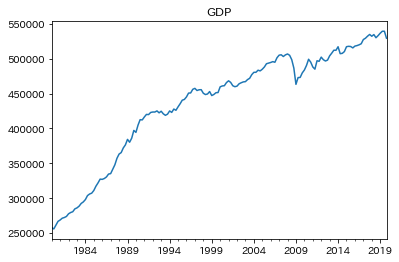

In [5]:
df['gdp'].plot(title='GDP')
pass

長期的には上昇トレンドであることが分かる。これが経済成長である。一方で，よく観察するとギザギザに動いていることも確認できる。景気変動である。小さい上下の動きもあれば，より大きな動きもある。例えば，1994年頃のバブル崩壊や2008年のリーマン・ショックの影響でGDPは大きく下落している。

> (問４）なぜ景気変動は起こるのか？

これがマクロ経済学のもう一つのBig Questionである。この章以降は問４を中心にマクロ経済を考察することになる。

上の図には2020年第１四半期以降のデータは含まれていない。参考の為に最新のデータを次の図に表示する。

In [6]:
from IPython.display import IFrame
IFrame(src='https://fred.stlouisfed.org/graph/graph-landing.php?g=BOLN&width=420&height=320',
       width=450, height=330)

コロナ禍の影響により，リーマンショック時以上の下げ幅となっている。ちなみに，この図は[米国セントルイス連邦準備銀行が管理するFederal Reserve Economic Data (FRED)](https://fred.stlouisfed.org)と呼ばれるデータ・ベースからライブでダウンロードして表示している。

`py4macro`を使った図もしくはFREDの図はGDPの水準を表示しているため，GDPの成長率を直接読み取り異なる時期の成長率を比べることは難しい。それを可能にするのが対数化したGDPのプロットである。

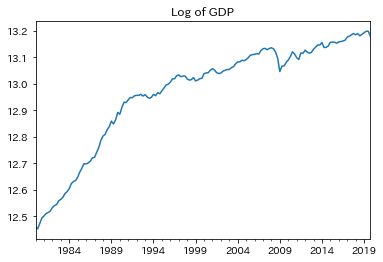

In [7]:
df['gdp_log'] = np.log(df['gdp'])

df['gdp_log'].plot(title='Log of GDP')
pass

対数化された変数の傾きは四半期ごとの成長率である。1990年代半ばのバブル崩壊の影響によりその後のGDPの伸びが鈍化していることがわかる。また2008年のリーマン・ショックの影響も大きいことがわかる。では四半期成長率を図示するために、変数`x`の成長率は次の式で計算できることを思い出そう。


$$
1+g_x=\frac{x_{t+1}}{x_{t}}
$$

$$
\Downarrow\;\text{対数化}
$$

$$
\log(1+g_x)=\log(x_{t+1})-\log(x_{t})
$$

$$
\Downarrow\;\text{左辺を近似}
$$

$$
g_x\approx\log(x_{t+1})-\log(x_{t})
$$

この式を使い四半期成長率を計算する。

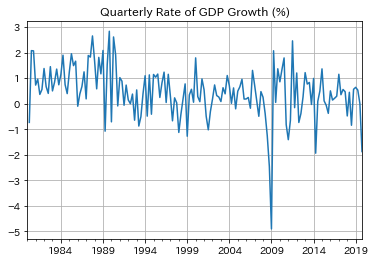

In [8]:
df['gdp_growth_quarter'] = 100*df['gdp_log'].diff()   # 1

# 2
ax_ = df['gdp_growth_quarter'].plot(title='Quarterly Rate of GDP Growth (%)')
ax_.grid()   # 3
pass

```{admonition} コードの説明
:class: dropdown
1. `.diff()`は差分を計算するメソッドであり，引数の数（デフォルトは`1`）は何期前の値と差分を計算するかを指定する。
2. `Pandas`のメソッド`plot`は図を表示し，同時に図の「軸（axis）」を返すが、それを変数`ax_`に割り当てている。
3. 軸の変数`ax_`には様々なメソッドが用意されており、その１つがグリッド線を表示する`.grid()`である。
```

新聞などで「前年同期比成長率」という表現をみたことがあると思うが、`diff()`の引数を`4`にすることにより、前年同期比の成長率を計算することができる。それを図示してみよう。

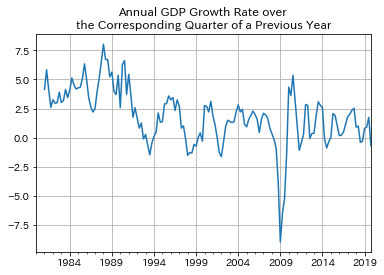

In [9]:
df['gdp_growth_annual'] =  100*df['gdp_log'].diff(4)

ax_ = df['gdp_growth_annual'].plot(title=
      'Annual GDP Growth Rate over \nthe Corresponding Quarter of a Previous Year')
ax_.grid()
pass

上の図と比べると縦軸の幅の違いに気づくだろう。最高値と最小値を計算してみよう。

In [10]:
df['gdp_growth_annual'].max(), df['gdp_growth_annual'].min()

(8.034701060743288, -8.989679641084258)

1990年代のバブル景気には約`8`％増加しているが、リーマン・ショック時には約`9`％下落している。

次の点を知っておくのも有用だろう。
* 次の式を使うと四半期成長率を年率換算することもできる。

    $$
    g_{\text{年率換算成長率}}=\left(1+g_{\text{四半期成長率}}\right)^4-1
    $$

    $g_{\text{四半期成長率}}$が４期続くことを想定した成長率である。
* 年次データを使うとGDPの値は均されるので変化率は低めに出る。

## GDPの構成要素

次式は所得恒等式である。
```
    GDP=消費＋投資＋政府支出＋純貿易（輸出ー輸入）
```
GDPに対してそれぞれ構成要素は何％を占め、どのように推移したかを図示する為に，まず変数を計算する。

In [11]:
# 消費の割合
con_gdp_ratio = 100 * df['consumption'] / df['gdp']

# 投資の割合
inv_gdp_ratio = 100 * df['investment'] / df['gdp']

# 政府支出の割合
gov_gdp_ratio = 100 * df['government'] / df['gdp']

# 純輸出の割合
net_exp_gdp_ratio = 100 * ( df['exports']-df['imports'] ) / df['gdp']

それぞれの平均を`for`ループで計算し表示してみよう。

In [12]:
ratio_list = [con_gdp_ratio,inv_gdp_ratio,
              gov_gdp_ratio,net_exp_gdp_ratio]

label_list = ['Consumption','Investment','Gov Exp','Net Exports']

for r, l in zip(ratio_list, label_list):
    avr = r.mean()
    print(l, f'\t{avr:.1f}')

Consumption 	57.1
Investment 	20.4
Gov Exp 	25.8
Net Exports 	-1.6


消費はGDPの`60`％近くあり、GDPの約1/4が政府支出となっている。消費とは対照的に、投資は約`20`％であり消費の約３分の１である。（小数点第一位までしか表示していないため合計は100にならない。）

次に推移を確認する。同じように`for`ループを使うと簡単に表示できる。

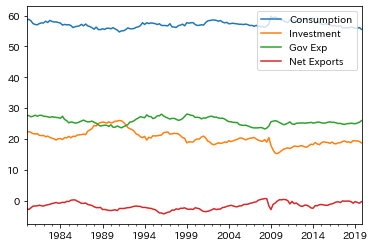

In [13]:
for r, l in zip(ratio_list,label_list):
    r.plot(label=l, legend=True)

````{admonition} コードの説明
:class: dropdown

* `zip()`について説明する。`zip()`はループによく使われる便利な関数である。以下の単純な`for`ループ
    ```
    for r in ratio_list:
        r.plot()
    ```
    にはループ用の変数が`r`の１種類しかない。これでも図示することは可能である。しかし凡例を追加するためには`label_list`も`for`ループの中で同時に使う必要がある。そのような場合に便利な関数が`zip()`である。引数に`ratio_list`と`label_list`を入れると、同時に順番に要素にアクセスできる。それぞれの要素を割り当てる変数として`r`と`l`を使っている。`r`と`l`の間に`,`を入れることにより、それぞれ別のリストの要素を捉えることができる。
* この`for`ループは以下と等しい。
    ```
    con_gdp_ratio.plot(label='Consumption', legend=True)
    inv_gdp_ratio.plot(label='Investment', legend=True)
    gov_gdp_ratio.plot(label='Gov Exp', legend=True)
    net_exp_gdp_ratio.plot(label='Net Exports', legend=True)
    ```
    もちろんこれでも良いが、コードを書く際は極力同じような行を繰り返すのではなくループを使ってまとめる方が良い。第一の理由は、簡単なエラーの可能性を軽減することができることだ。リピートして書く場合、1行をコピペしその後に1行ずつ修正をするパターンが多いが、最初の１行目が間違っている場合、全ての行を修正する必要が発生する。その際に修正し忘れることがある。第二の理由は、コードの修正も簡単になるためである。例えば、`linewidth=2`を設定したいとしよう。`for`ループの場合は一箇所に加えるだけで済むことになる。
````

景気の動向によって上下することがわかる。例えば、リマン・ショック後には投資が大きく下落し少しずつしか上昇しない。一方、景気悪化に反応し政府支出の割合は上昇している。またバブル景気ではその逆が起こっており、順位が逆転する程である。このデータセットには入ってないが，2020年にはコロナ禍によって大きな変化が発生している。

## トレンドと変動

### 説明

マクロ変数はトレンドと変動（サイクル）に分解することができる。例えば、$Y$をGDPとすると次式のように２つの項で表すことができる。

$$
Y=Y_t^{\text{trend}}Y_t^{\text{cycle}}
$$ (eq:10-decompose)

$Y_t^{\text{trend}}$は長期的な傾向を表し，経済成長を捉えている。トレンドが右上がりでないものありえる。例えば，失業率の場合，自然失業率が一定であればトレンドはないということになる。一方，$Y_t^{\text{cycle}}$は短期的な景気循環を表す。内閣府は景気循環を「山」と「谷」の２つに分けて[景気基準日付](https://www.esri.cao.go.jp/jp/stat/di/hiduke.html)を発表している。トレンドを上回っている期間を「山」，下回っている期間を「谷」と考えて良いだろう。ただトレンドの計算方法や考え方は色々あり，ここで使うデータに含まれるトレンドは経済学研究のスタンダードな手法で計算したものだが，内閣府の景気基準日付とは合致しない。いずれにしろ，どのようにトレンドや景気基準日付を決めたとしても，景気循環が人々の厚生に大きな影響を及ぼすことには変わりはない。景気が悪くなると，失業や様々な社会問題（例えば、犯罪や自殺）につながる。景気が良い場合でも問題が無いわけではない。例えば、高いインフレが発生し資産価値（例えば、貨幣）が暴落し通常の生活に支障が出ることもある。またバブル景気が示すように「山」は次の「谷」の芽を育む期間となりえる。

以下では、データを使い景気循環$Y_t^{\text{cycle}}$の特徴を調べる。まず上の式を対数化し次式に書き換える。

$$
y_t^{\text{cycle}}=y_t-y_t^{\text{trend}}
$$ (eq:10-decompose_log)

ここで小文字は大文字の変数を対数化した値である（例えば、$y_t\equiv\log(Y_t)$）。$y_t^{\text{cycle}}$をより直感的に解釈するために式[](eq:10-decompose_log)の右辺を次のように近似できる。

$$
y_t^{\text{cycle}}\approx\dfrac{Y_t-Y_t^{\text{trend}}}{Y_t^{\text{trend}}}
$$ (eq:10-decompose_log_approx)

即ち，$y_t^{\text{cycle}}$は変数$Y_t$のトレンドからの乖離をパーセンテージで表している。

これまでの説明から，景気循環を捉える項は変数の値とトレンドの残差によって決まることがわかる。換言すると，景気循環の特徴はトレンドをどのように考えるかに依存している。ではどのようにトレンドを決めるのか。ここでは経済学研究でスタンダードな手法となっているHodrick–Prescottフィルターと呼ばれる手法を使う。詳細についての説明は控え，単に`py4macro`に含まれる関数`trend`を使ってトレンド抽出を行うことにする。使い方次のコードで確認できる。

In [14]:
help(py4macro.trend)

Help on function trend in module py4macro.py4macro:

trend(s, lamb=1600)
    |
    | 引数:
    |     s: Seriesもしくは１列のDataFrameとし，行のラベルはDatetimeIndexとすること。
    |     lamb: 四半期用のデータでは通常の値（デフォルト：1600）
    |
    | 返り値:
    |     Hodrick-Prescott filterで計算したtrend（トレンド）のSeries
    |
    | 例: py4macro.trend(df.loc[:,'gdp'])



使い方は簡単で，トレンドを計算したい変数の`Series`もしくは１列の`DataFrame`を引数に設定し実行するとトレンドが返される。

まず次の変数のトレンドを計算し対数化した後に`df`に追加する。

In [15]:
var_list = ['gdp',
            'consumption',
            'investment',
            'government',
            'exports',
            'imports']

In [16]:
for v in var_list:
    df[v+'_trend'] = py4macro.trend(df.loc[:,v])  # 1

```{admonition} コードの説明
:class: dropdown

1. 右辺の`py4macro.trend()`はトレンドを`Series`として返し，それを左辺では新たな列として追加している。ここで列ラベルを`v+'_trend'`としているのは元々の変数名の後に`_trend`を追加するためである。例えば，１回目のループの新たな列ラベルは`gdp_trend`となり，２回目のループでは`consumption_trend`となる。
```

`df`の属性`.columns`を使い、列ラベルを表示して確認してみよう。

In [17]:
df.columns

Index(['gdp', 'consumption', 'investment', 'government', 'exports', 'imports',
       'capital', 'employed', 'unemployed', 'unemployment_rate', 'hours',
       'total_hours', 'inflation', 'gdp_log', 'gdp_growth_quarter',
       'gdp_growth_annual', 'gdp_trend', 'consumption_trend',
       'investment_trend', 'government_trend', 'exports_trend',
       'imports_trend'],
      dtype='object')

`_trend`が使いされた変数が６つあることが確認できる。

### GDP

対数化したGDPの変数を作成しトレンドと重ねて図示してみる。

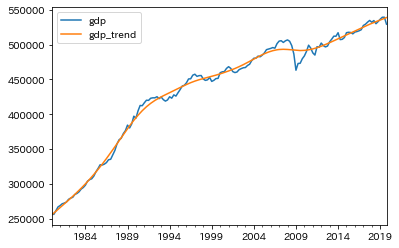

In [18]:
df[['gdp','gdp_trend']].plot()
pass

トレンドは直線ではなくスムーズな曲線となっている。上下に動く変数を平滑化したものがトレンドなので直線になるとは限らないのである。

次に景気循環の変数を作成するが，トレンドからの乖離を％で表すために次の関係を利用する。

$$
\log\left(\frac{X}{Z}\right)
=\log\left(1+\frac{X-Z}{Z}\right)
\approx\frac{X-Z}{Z}
$$ (eq:10-devaition)

In [19]:
df['gdp_cycle'] = 100 * np.log( df['gdp']/df['gdp_trend'] )

`0`に横線を引いてプロットしてみよう。

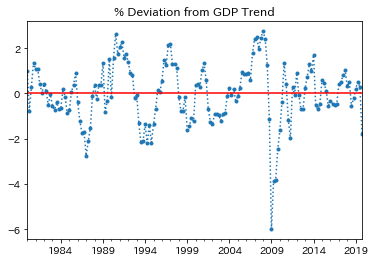

In [20]:
ax_ = df['gdp_cycle'].plot(marker='.',    # 1
                           linestyle=':',
                           title='% Deviation from GDP Trend')
ax_.axhline(0, color='red')               # 2
pass

```{admonition} コード説明
:class: dropdown

1. `Pandas`のメソッド`plot`は図を表示すると共に図の「軸（axis）」を返すが、それを変数`ax`に割り当てている。
    * `marker`はデータのマーカーを指定する引数であり，`'.'`は小さな点を指定している。
    * `linestyle`は線のスタイルを指定する引数であり，`':'`は点線を指定している。
2. `ax_`のメソッド`.axhline()`を使うと横線を描くことができる。
    * 縦軸の値`0`は必須の引数
    * `color=red`は色を指定する引数（無くても良い）。
```

図の景気循環はトレンドからの乖離である。乖離の典型的な特徴としてpersistenceがある。これは同じ方向の乖離が続く傾向があるという意味である。即ち，今期景気が良ければ（悪ければ）来期も景気が良い（悪い）可能性が高いということである。もちろん、いずれは乖離が狭まり「山」から「谷」，そして「山」へと循環して行く。Persistenceを示す数値として自己相関係数がある。

説明するために２つの変数$Y$と$Z$を考え次の係数を定義しよう。

$$
R(Y,Z)=
\frac{
    \text{YとZの標本共分散}
    }{
    \sqrt{\text{Yの標本分散}}
    \sqrt{\text{Xの標本分散}}
    }
$$ (eq:10-YZ)

* 分子の標本共分散が符号を決定する。
* 分母は$R(Y,Z)$の値が$-1\leq R(Y,Z)\leq 1$となるよう標準化している。

$t$期のGDPを$x_t$としよう。式[](eq:10-YZ)を使うと，$Y$と$Z$が次の場合に$x_t$の自己相関係数となる。

$$
Y=x_t,\quad Z=x_{t-1}
$$ (eq:10-autocorrelation)

直感的に説明すると，自己相関とは今期の値が前期の値に依存する程度をいう。前期の影響が強ければ，自己相関係数の絶対値は大きくなる。

式[](eq:10-autocorrelation)として式[](eq:10-YZ)を計算するが，`Series`にはそれを計算するメソッド`.autocorr()`が用意されている。

In [21]:
df['gdp_cycle'].autocorr()

0.7644516243719673

正の値であり，今期に高（低）ければ来期も高い（低い）可能性が非常に大きいことが分かる。第二の特徴として、「山」と「谷」の形、幅（期間）、高さ（深さ）はまちまちであり、不確実な要素の働きが大きい。言い換えると、景気循環の予測は非常に難しい。この点は確率変数として捉えることができるが、このアプローチは後のトピックで扱う。

### GDPの構成要素

#### トレンドからの乖離

次にGDPの構成要素について考えるが，まずトレンドからの乖離の変数を作成する（単位：％）。

In [22]:
for v in var_list[1:]:   # gdp以外の変数    
    df[v+'_cycle'] = 100 * np.log( df[v]/df[v+'_trend'] )

図示する変数のリスを作成するために，列ラベルを確認しよう。

In [23]:
df.columns

Index(['gdp', 'consumption', 'investment', 'government', 'exports', 'imports',
       'capital', 'employed', 'unemployed', 'unemployment_rate', 'hours',
       'total_hours', 'inflation', 'gdp_log', 'gdp_growth_quarter',
       'gdp_growth_annual', 'gdp_trend', 'consumption_trend',
       'investment_trend', 'government_trend', 'exports_trend',
       'imports_trend', 'gdp_cycle', 'consumption_cycle', 'investment_cycle',
       'government_cycle', 'exports_cycle', 'imports_cycle'],
      dtype='object')

列ラベルに`_cycle`がついている変数だけを選ぶために`cycle_list`を作成する。

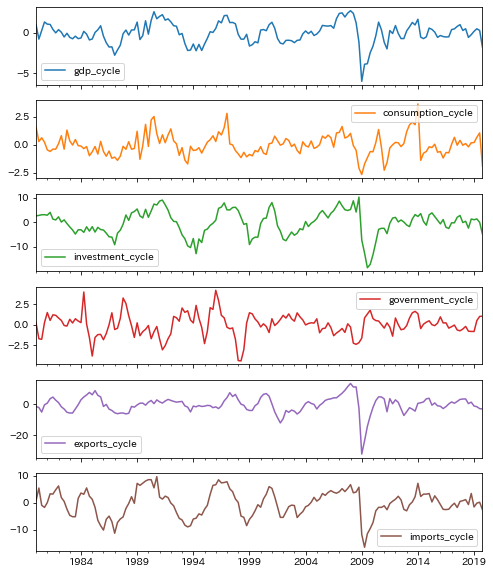

In [24]:
cycle_list = df.columns[-6:]   # 最後の6変数

df.loc[:,cycle_list].plot(subplots=True, figsize=(8,10))
pass

この図に基づいて３つの点について考える。
1. Persistenceを示す自己相関
1. GDPと順循環的（pro-cyclical）か反循環的（counter- cyclical）かどうか
1. 変動の大きさの比較

#### 自己相関

`for`ループを使って自己相関係数を計算しよう。

In [25]:
for v in cycle_list:
    autocorr = df[v].autocorr()           # (1)
    print(f'{v:<19}{autocorr:>5.2f}')     # (2)

gdp_cycle           0.76
consumption_cycle   0.52
investment_cycle    0.84
government_cycle    0.64
exports_cycle       0.77
imports_cycle       0.83


```{admonition} コードの説明
:class: dropdown

1. `.autocorr()`は自己相関係数を計算するメソッド。
2. `f-string`を使っている。
    * `<19`は`v`の文字列の長さを空白を足して`19`にし左詰めにする。
    * `>5`は`corr`の文字列の長さを空白を足して`5`にし右詰めにする。
    * `.2f`は小数点第二位までの表示を設定している。
        * `>5`と`.2f`の順番を逆にするとエラーが発生する。
```

全て`0.5`以上であり，強いpersistenceが確認できる。

#### GDPとの相関度

GDPと他の変数との相関度を確認するために２変数の相関係数を考えよう。式[](eq:10-YZ)を使うと$Y$と$Z$は次のようになる。

$$
Y=\text{GDP},\quad
Z=\text{GDPの構成要素の変数}
$$ (eq:10-correlation)

式[](eq:10-correlation)として式[](eq:10-YZ)を計算するが，`Series`にはそれを計算するメソッド`.corr()`が用意されている。`for`ループを使って計算しよう。

In [26]:
print('GDPの変動との相関係数\n------------------------')

for v in cycle_list:
    corr = df[['gdp_cycle', v]].corr().iloc[0,1]  # 1
    print(f'{v:<19}{corr:>5.2f}')                 # 2

GDPの変動との相関係数
------------------------
gdp_cycle           1.00
consumption_cycle   0.71
investment_cycle    0.82
government_cycle   -0.13
exports_cycle       0.70
imports_cycle       0.70


```{admonition} コードの説明
:class: dropdown

1. `.corr()`は相関係数を計算するメソッドであり、2x2の行列を返す。
    * `iloc[0,1]`は相関係数の値を抽出している。`iloc[1,0]`でも同じ結果となる。
2. `f-string`を使っている。
    * `<19`は`v`の文字列の長さを空白を足して`19`にし左詰めにする。
    * `>5`は`corr`の文字列の長さを空白を足して`5`にし右詰めにする。
    * `.2f`は小数点第二位までの表示を設定している。
        * `>5`と`.2f`の順番を逆にするとエラーが発生する。
```

政府支出以外は全て相関係数は正の値であり、値も大きい。即ち、順循環的である（裏にあるメカニズムを考えてみよう）。下の図はGDPと投資の散布図であり、正の相関を明確に確認できる。

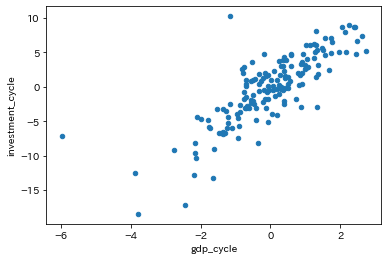

In [27]:
df.plot(x='gdp_cycle', y='investment_cycle', kind='scatter')
pass

一方、政府支出の値は負であり、景気循環をコントロールしようとする政府の政策の現れと解釈できる。値が小さいのは、時間的なラグがあるためだと思われる。景気に関するデータを集計するには数ヶ月かかり、国会審議や支出の実行にも時間を取られることになる。時間的なラグを捉えるために、`Series`のメソッド`.shift()`を使って相関係数を再計算してみる。

In [28]:
print('  GDPとの相関係数\n-----------------------')
for n in range(1,12):
    df_temp = df     # 1
    df_temp['gov_cycle_shift'] = df_temp['government_cycle'].shift(-n)  # 2
    corr = df_temp[['gdp_cycle', 'gov_cycle_shift']].corr().iloc[0,1]
    print(f'{n:>3}期先の政府支出: {corr:>6.3f}')

  GDPとの相関係数
-----------------------
  1期先の政府支出: -0.277
  2期先の政府支出: -0.372
  3期先の政府支出: -0.408
  4期先の政府支出: -0.315
  5期先の政府支出: -0.265
  6期先の政府支出: -0.151
  7期先の政府支出: -0.045
  8期先の政府支出:  0.043
  9期先の政府支出:  0.089
 10期先の政府支出:  0.101
 11期先の政府支出:  0.091


```{admonition} コードの説明
:class: dropdown

1. `df`を変更しないように`df_temp`を新しく作成する。
2. `.shift()`の引数は値を先に何期ずらすかを指定する。比べたいのは$t$期のGDPと$t+n$期の政府支出なので、後にずらす必要があるためマイナス符号を付けて`.shift(-t)`としている。
```

GDPの乖離は第3四半期先の政府支出との相関係数が最大となっている。景気循環に対する政府の姿勢が確認できる一方，政府の対応には長いの時間が掛かることを示す結果となっている。

#### 変動の大きさ

次に変動の大きさを考えるために、GDPの標準偏差に対するそれぞれの構成要素の標準偏差の比率を計算する。

In [29]:
for v in cycle_list:
    var = df[v].std() / df['gdp_cycle'].std()
    print(f'{v:<19}{var:>5.2f}')

gdp_cycle           1.00
consumption_cycle   0.72
investment_cycle    3.84
government_cycle    1.01
exports_cycle       4.06
imports_cycle       3.69


投資、輸出、輸入の値はGDPの約4の値であり、政府支出とGDPの変動は殆ど同じである。一方、消費の変動は非常に小さい。これは消費者の不確実性を嫌う姿勢が反映されていると解釈できる。GDPの構成要素を対GDP比率で検討した際、消費は投資よりも比率が大きかったことを思い出そう。変動に関しては、順位が逆転し投資が上回っている。この点を図示して視覚的に確認する。

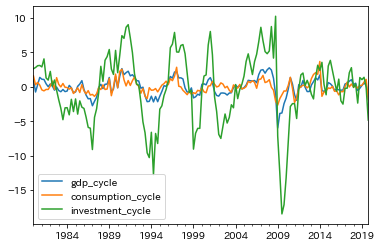

In [30]:
df.loc[:,cycle_list[:3]].plot()
pass

これらの結果を説明するために，効用最大化に基づく消費者理論があり，利潤最大化に基づく企業行動に関するモデルが使われている。